In [1]:
import xarray as xr
import hvplot.xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import datetime as dt
import tqdm
from climtas.nci import GadiClient
import glob
import metpy
from working.sea_breeze.load_barra import load_barra_wind_data, load_barra_variable, load_barra_static,get_intake_cat
from working.sea_breeze.coastline_funcs import *


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
lat_slice = slice(-45,-39)
lon_slice = slice(142,150)
#lat_slice = slice(-15,-5)
#lon_slice = slice(125,135)
# lat_slice = slice(-45,-5)
# lon_slice = slice(110,155)

In [25]:
orog, lsm = load_barra_static("AUST-04",lon_slice,lat_slice)
angles = get_coastline_angle_sorting(lsm,N=4,size_thresh=12,erosion_footprint=morphology.disk(5))
angles_ds = expand_coastline_angles(lsm,angles,R=300,N=6,dx=4)

Dropping land mass 4 for intersecting boundary
Dropping land mass 12 for intersecting boundary
Dropping land mass 16 for intersecting boundary
Dropping land mass 17 for intersecting boundary
Dropping land mass 18 for intersecting boundary
Expanding angles to average of closest 6 points within 300 kms...


100%|██████████| 1125000/1125000 [03:28<00:00, 5384.90it/s]


In [3]:
orog, lsm = load_barra_static("AUS-11",lon_slice,lat_slice)
angles = get_coastline_angle_sorting(lsm,N=4,size_thresh=12,erosion_footprint=morphology.disk(4))
angles_ds = expand_coastline_angles(lsm,angles,R=300,N=6,dx=12)

Expanding angles to average of closest 6 points within 300 kms...


100%|██████████| 4015/4015 [00:00<00:00, 5141.47it/s]


In [4]:
#Get coastline angle using a fitted polynomial (without ordering points)
# lsm_ds = get_coastline(lsm)
# lsm_ds = get_coastline_angle_fitted(lsm_ds, R=300, N=10)

In [5]:
# plt.figure(figsize=[12,12])
# ax=plt.subplot(2,3,1,projection=ccrs.PlateCarree())
# lsm_ds.lsm.plot()
# plt.title("Land-sea mask (LSM)")
# ax.coastlines()

# ax=plt.subplot(2,3,2,projection=ccrs.PlateCarree())
# lsm_ds.coast.plot()
# plt.title("Coastline defined using\nLSM")
# ax.coastlines(lw=0.01)

# ax=plt.subplot(2,3,3,projection=ccrs.PlateCarree())
# lsm_ds.coastline_main.plot()
# plt.title("Coastline with small islands\nremoved")
# ax.coastlines(lw=0.01)

# ax=plt.subplot(2,3,4,projection=ccrs.PlateCarree())
# lsm_ds.angles.plot(cmap="hsv")
# plt.title("Local angle of coastline,\nsmoothed (angle from N)")
# ax.coastlines(lw=0.01)

# ax=plt.subplot(2,3,5,projection=ccrs.PlateCarree())
# lsm_ds.angles_expanded.plot(vmin=0,vmax=180,cmap="hsv")
# plt.title("Neighbourhood average angle\n within 300 km of coast\n(angle from N)")
# ax.coastlines()

# ax=plt.subplot(2,3,6,projection=ccrs.PlateCarree())
# lsm_ds.coastline_expanded.plot()
# plt.title("Expanded coastline \nwithin 300 km of coast\n(angle from N)")
# ax.coastlines()

# plt.subplots_adjust(hspace=0.3,wspace=0.3)

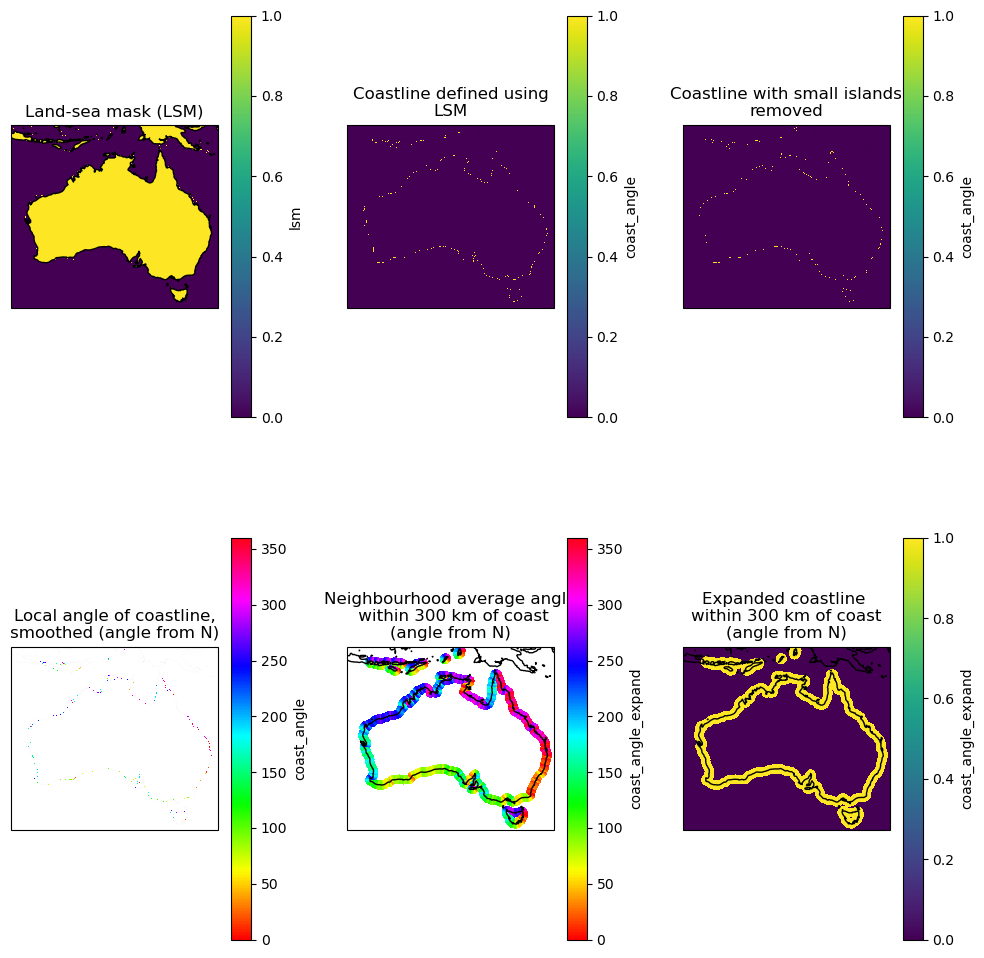

In [23]:
plt.figure(figsize=[12,12])
ax=plt.subplot(2,3,1,projection=ccrs.PlateCarree())
angles_ds.lsm.plot()
plt.title("Land-sea mask (LSM)")
ax.coastlines()

ax=plt.subplot(2,3,2,projection=ccrs.PlateCarree())
(~angles_ds.coast_angle.isnull()).plot()
plt.title("Coastline defined using\nLSM")
ax.coastlines(lw=0.01)

ax=plt.subplot(2,3,3,projection=ccrs.PlateCarree())
(~angles_ds.coast_angle.isnull()).plot()
plt.title("Coastline with small islands\nremoved")
ax.coastlines(lw=0.01)

ax=plt.subplot(2,3,4,projection=ccrs.PlateCarree())
angles_ds.coast_angle.plot(cmap="hsv",vmin=0,vmax=360)
plt.title("Local angle of coastline,\nsmoothed (angle from N)")
ax.coastlines(lw=0.01)

ax=plt.subplot(2,3,5,projection=ccrs.PlateCarree())
angles_ds.coast_angle_expand.plot(vmin=0,vmax=360,cmap="hsv")
plt.title("Neighbourhood average angle\n within 300 km of coast\n(angle from N)")
ax.coastlines()

ax=plt.subplot(2,3,6,projection=ccrs.PlateCarree())
(~angles_ds.coast_angle_expand.isnull()).plot()
plt.title("Expanded coastline \nwithin 300 km of coast\n(angle from N)")
ax.coastlines()

plt.subplots_adjust(hspace=0.3,wspace=0.3)

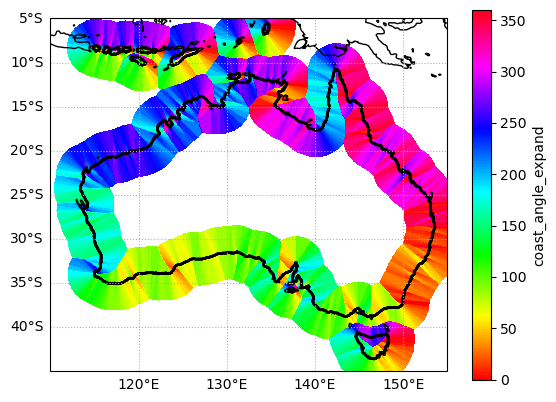

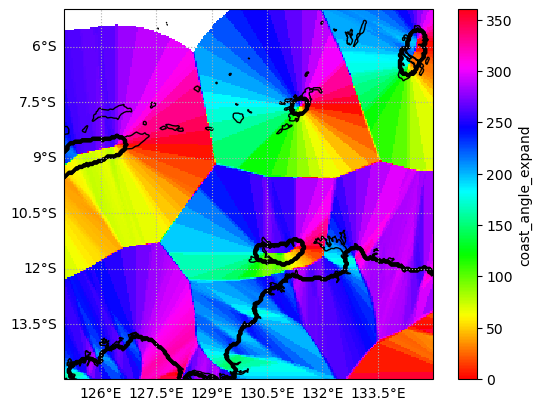

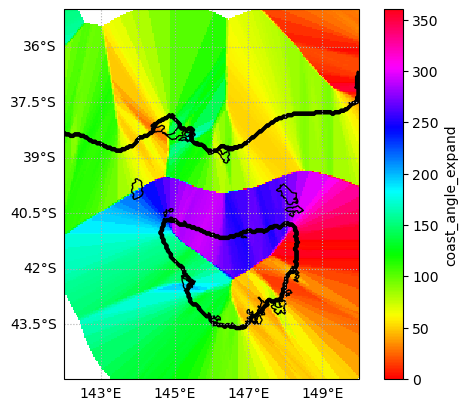

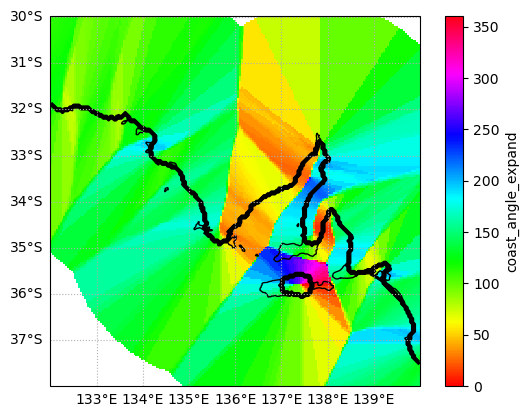

In [30]:
plt.figure()
ax=plt.axes(projection=ccrs.PlateCarree())
angles_ds.coast_angle_expand.plot(vmin=0,vmax=360,cmap="hsv")
xr.plot.contour(angles_ds.coast_angle.isnull(),colors="k")
ax.coastlines()
ax.gridlines(draw_labels=["left","bottom"],ls=":")

plt.figure()
ax=plt.axes(projection=ccrs.PlateCarree())
angles_ds.sel(lat=slice(-15,-5),lon=slice(125,135)).coast_angle_expand.plot(vmin=0,vmax=360,cmap="hsv")
xr.plot.contour(angles_ds.sel(lat=slice(-15,-5),lon=slice(125,135)).coast_angle.isnull(),colors="k")
ax.coastlines()
ax.gridlines(draw_labels=["left","bottom"],ls=":")

plt.figure()
ax=plt.axes(projection=ccrs.PlateCarree())
angles_ds.sel(lat=slice(-45,-35),lon=slice(142,150)).coast_angle_expand.plot(vmin=0,vmax=360,cmap="hsv")
xr.plot.contour(angles_ds.sel(lat=slice(-45,-35),lon=slice(142,150)).coast_angle.isnull(),colors="k")
ax.coastlines()
ax.gridlines(draw_labels=["left","bottom"],ls=":")

plt.figure()
ax=plt.axes(projection=ccrs.PlateCarree())
angles_ds.sel(lat=slice(-38,-30),lon=slice(132,140)).coast_angle_expand.plot(vmin=0,vmax=360,cmap="hsv")
xr.plot.contour(angles_ds.sel(lat=slice(-38,-30),lon=slice(132,140)).coast_angle.isnull(),colors="k")
ax.coastlines()
ax.gridlines(draw_labels=["left","bottom"],ls=":")

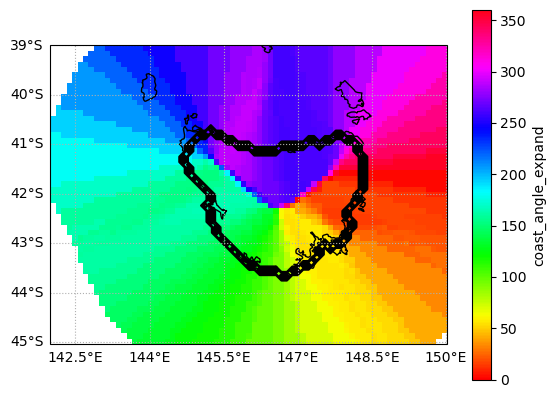

In [4]:
plt.figure()
ax=plt.axes(projection=ccrs.PlateCarree())
angles_ds.coast_angle_expand.plot(vmin=0,vmax=360,cmap="hsv")
xr.plot.contour(angles_ds.coast_angle.isnull(),colors="k")
ax.coastlines()
ax.gridlines(draw_labels=["left","bottom"],ls=":")